# Get data for BASE-9

This notebook tests my codes to grab data from Gaia, Pan-STARRS, and 2MASS, then use Gaia data to estimate membership probabilities, and output a phot file for BASE-9

### Gaia:
- https://gea.esac.esa.int/archive/documentation/GDR3/Gaia_archive/chap_datamodel/sec_dm_main_source_catalogue/ssec_dm_gaia_source.html
- https://gea.esac.esa.int/archive/documentation/GDR3/index.html
- https://gaia.aip.de/metadata/gaiadr3/

### Pan-STARRS:
- https://gaia.aip.de/metadata/gaiaedr3/panstarrs1_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_panstarrs1_original_valid.html
- https://allendowney.github.io/AstronomicalData/05_join.html

### 2MASS:
- https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries
- https://gaia.aip.de/metadata/gaiaedr3/tmass_psc_xsc_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_crossmatches/ssec_dm_tmass_psc_xsc_join.html
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_tmass_original_valid.html



In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as units
import numpy as np
from bokeh.plotting import *

In [13]:
%load_ext autoreload
%autoreload 2
from getGaiaData import GaiaClusterMembers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Generally, we can pull the central coordinates and size from my OC summary data here : 
# https://github.com/ageller/compileOCs
NGC188 = GaiaClusterMembers(12.108, 85.255, 1)
NGC188.verbose = 1
NGC188.getData()
NGC188.data

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,teff_gspphot,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,K,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
2300190316856449792,359.98750319791213,85.27731021181354,5.577777946544573,0.8223713177577376,--,19.63665,341.99533,20.002611,18.388771,19.328531,20.541069,-0.1341667036106458,--,0.94112283,1,0,20.0638008117676,0.0188410002738237,19.6161003112793,0.0171440001577139,19.4860992431641,0.0176279991865158,19.4738998413086,0.024957999587059,19.2819995880127,0.0314869992434978,--,--,--,--,--,--,0.0042036385,0.059109326,0.052991793
2300190389873017344,359.98580433917704,85.29153336809398,-0.45119658435619325,-7.369807586160412,--,15.3995,3061.557,16.214743,423.20645,14.515954,665.11975,2.6719380963486183,4465.8047,1.0373826,1,0,16.5529003143311,0.00435000006109476,15.4191999435425,0.00275099999271333,14.9090995788574,0.00281400000676513,14.6612997055054,0.0038459999486804,14.5123996734619,0.00355900009162724,13.351,0.026,12.689,0.027,12.589,0.024,0.0027780489,0.0037903613,0.004116847
2300194513040635392,359.9672581412721,85.35538913265248,-9.5544722428929,11.493419487214474,--,20.776224,104.699455,21.09304,5.081117,19.413204,11.7823105,0.2914078457257431,--,1.2037239,1,0,--,--,--,--,20.043399810791,0.0434660017490387,19.3617000579834,0.0285819992423058,19.0830993652344,0.0577099993824959,--,--,--,--,--,--,0.01072983,0.21369882,0.09222715
2300195539536739968,359.9561033834297,85.38657068886691,-3.6040957972934886,-4.830773107328921,--,19.797134,292.3895,20.890688,11.483998,18.660702,37.19538,1.6650491955322446,--,1.0105067,1,0,21.6236000061035,0.167224004864693,20.1315002441406,0.0238770004361868,19.0904006958008,0.0103240003809333,18.5962009429932,0.0114460000768304,18.3631000518799,0.0377160012722015,--,--,--,--,--,--,0.00462391,0.09458455,0.029433731
2300195543833751936,359.93715165090276,85.39148265642352,-7.484505222627249,-1.0243014405359296,--,17.474413,1381.5422,18.050188,113.562935,16.749992,160.39871,0.45945903459236864,4855.8975,0.98020154,1,0,18.2007999420166,0.00268099992536008,17.4680004119873,0.00554100004956126,17.1201000213623,0.00322500010952353,16.9694995880127,0.00489299977198243,16.8798999786377,0.0127280000597239,15.859,0.079,15.547,0.127,15.157,0.138,0.0028652065,0.009959477,0.007752603
573291861010519936,17.86475655428175,84.40895212731938,-3.1184996834597936,6.959047729898664,--,19.583765,309.9595,21.041176,6.721011,18.39454,41.02457,1.3949384522215436,--,0.975186,1,0,21.4948997497559,0.0286309998482466,20.2254009246826,0.0351330004632473,18.8167991638184,0.0133720003068447,18.1676006317139,0.00936200004070997,17.8712997436523,0.0117070004343987,16.453,0.115,15.657,0.116,15.62,0.204,0.0044566384,0.16156767,0.026734002
573291861010520576,17.916517386254274,84.40633591882035,1.7401034596752953,-2.190226773476811,--,17.22847,1246.6713,17.823576,83.66266,16.4942,238.91078,0.7474290084478957,4625.978,0.9977198,1,0,18.0048007965088,0.0119939995929599,17.2082996368408,0.00548599986359477,16.8505992889404,0.00378999998793006,16.6968002319336,0.00445999996736646,16.6065998077393,0.00780799984931946,15.565,0.056,14.943,0.078,14.901,0.116,0.0028896835,0.0132741025,0.0059107053
573291895370259840,17.7

In [7]:
NGC188.data.columns

<TableColumns names=('source_id','ra','dec','pmra','pmdec','radial_velocity','phot_g_mean_mag','phot_g_mean_flux_over_error','phot_bp_mean_mag','phot_bp_mean_flux_over_error','phot_rp_mean_mag','phot_rp_mean_flux_over_error','parallax','teff_gspphot','ruwe','number_of_neighbours','number_of_mates','g_mean_psf_mag','g_mean_psf_mag_error','r_mean_psf_mag','r_mean_psf_mag_error','i_mean_psf_mag','i_mean_psf_mag_error','z_mean_psf_mag','z_mean_psf_mag_error','y_mean_psf_mag','y_mean_psf_mag_error','j_m','j_msigcom','h_m','h_msigcom','ks_m','ks_msigcom','phot_g_mean_mag_error','phot_bp_mean_mag_error','phot_rp_mean_mag_error')>

(-2.0, 4.0)

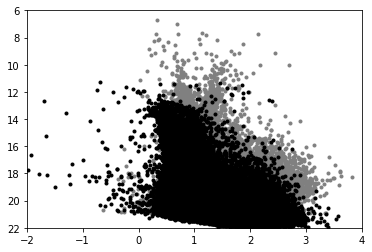

In [8]:
f, ax = plt.subplots()
ax.plot(NGC188.data['phot_bp_mean_mag'] - NGC188.data['phot_rp_mean_mag'], NGC188.data['phot_g_mean_mag'],'.', color='gray')
ax.plot(NGC188.data['g_mean_psf_mag'] - NGC188.data['i_mean_psf_mag'], NGC188.data['g_mean_psf_mag'],'.', color='black')
ax.set_ylim(22, 6)
ax.set_xlim(-2,4)

In [9]:
NGC188.plotNameRoot = 'plots/'
NGC188.verbose = 0

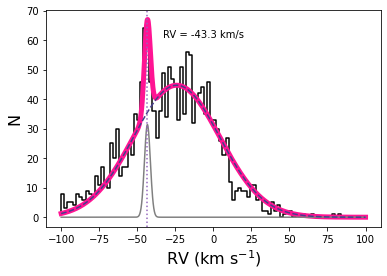

In [11]:
NGC188.getRVMembers()

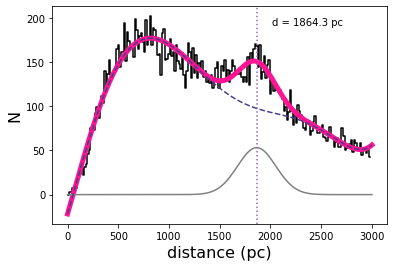

In [12]:
NGC188.distance = 1900 #pc
NGC188.getParallaxMembers()

finding proper-motion members ...


C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:345: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.set_ylim(self.PMymin, self.PMymax)


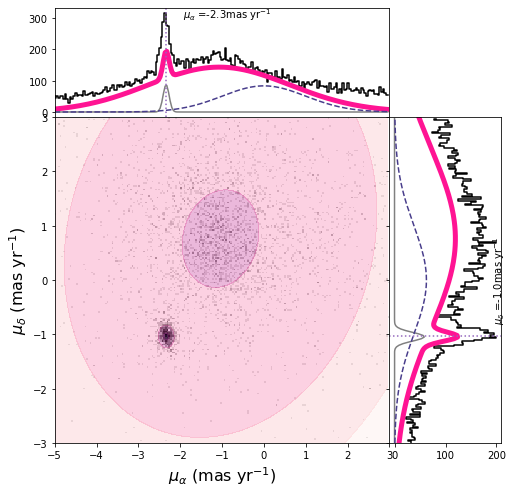

In [13]:
# this is very hard to fit for NGC 188!
NGC188.PMxmin = -5
NGC188.PMxmax = 3
NGC188.PMymin = -3
NGC188.PMymax = 3
NGC188.PMmean = [-2.5, -1]
NGC188.PMxbins = 200
NGC188.PMybins = 200
NGC188.verbose = 1
NGC188.getPMMembers()

In [14]:
NGC188.data

source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,teff_gspphot,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,PRV,PPa,PPM
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,K,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64
2300190316856449792,359.98750319791213,85.27731021181354,5.577777946544573,0.8223713177577376,--,19.63665,341.99533,20.002611,18.388771,19.328531,20.541069,-0.1341667036106458,--,0.94112283,1,0,20.0638008117676,0.0188410002738237,19.6161003112793,0.0171440001577139,19.4860992431641,0.0176279991865158,19.4738998413086,0.024957999587059,19.2819995880127,0.0314869992434978,--,--,--,--,--,--,0.0042036385,0.059109326,0.052991793,--,nan,0.0
2300190389873017344,359.98580433917704,85.29153336809398,-0.45119658435619325,-7.369807586160412,--,15.3995,3061.557,16.214743,423.20645,14.515954,665.11975,2.6719380963486183,4465.8047,1.0373826,1,0,16.5529003143311,0.00435000006109476,15.4191999435425,0.00275099999271333,14.9090995788574,0.00281400000676513,14.6612997055054,0.0038459999486804,14.5123996734619,0.00355900009162724,13.351,0.026,12.689,0.027,12.589,0.024,0.0027780489,0.0037903613,0.004116847,--,1.393492588159047e-14,0.0
2300194513040635392,359.9672581412721,85.35538913265248,-9.5544722428929,11.493419487214474,--,20.776224,104.699455,21.09304,5.081117,19.413204,11.7823105,0.2914078457257431,--,1.2037239,1,0,--,--,--,--,20.043399810791,0.0434660017490387,19.3617000579834,0.0285819992423058,19.0830993652344,0.0577099993824959,--,--,--,--,--,--,0.01072983,0.21369882,0.09222715,--,1.9210641383422348e-16,0.0
2300195539536739968,359.9561033834297,85.38657068886691,-3.6040957972934886,-4.830773107328921,--,19.797134,292.3895,20.890688,11.483998,18.660702,37.19538,1.6650491955322446,--,1.0105067,1,0,21.6236000061035,0.167224004864693,20.1315002441406,0.0238770004361868,19.0904006958008,0.0103240003809333,18.5962009429932,0.0114460000768304,18.3631000518799,0.0377160012722015,--,--,--,--,--,--,0.00462391,0.09458455,0.029433731,--,6.174760120055705e-11,0.0
2300195543833751936,359.93715165090276,85.39148265642352,-7.484505222627249,-1.0243014405359296,--,17.474413,1381.5422,18.050188,113.562935,16.749992,160.39871,0.45945903459236864,4855.8975,0.98020154,1,0,18.2007999420166,0.00268099992536008,17.4680004119873,0.00554100004956126,17.1201000213623,0.00322500010952353,16.9694995880127,0.00489299977198243,16.8798999786377,0.0127280000597239,15.859,0.079,15.547,0.127,15.157,0.138,0.0028652065,0.009959477,0.007752603,--,0.13324041474786458,0.0
573291861010519936,17.86475655428175,84.40895212731938,-3.1184996834597936,6.959047729898664,--,19.583765,309.9595,21.041176,6.721011,18.39454,41.02457,1.3949384522215436,--,0.975186,1,0,21.4948997497559,0.0286309998482466,20.2254009246826,0.0351330004632473,18.8167991638184,0.0133720003068447,18.1676006317139,0.00936200004070997,17.8712997436523,0.0117070004343987,16.453,0.115,15.657,0.116,15.62,0.204,0.0044566384,0.16156767,0.026734002,--,2.9527355739392034e-09,0.0
573291861010520576,17.916517386254274,84.40633591882035,1.7401034596752953,-2.190226773476811,--,17.22847,1246.6713,17.823576,83.66266,16.4942,238.91078,0.7474290084478957,4625.978,0.9977198,1,0,18.0048007965088,0.0119939995929599,17.2082996368408,0.00548599986359477,16.8505992889404,

In [15]:
NGC188.combineMemberships()

combining memberships ...


plotting CMD ...


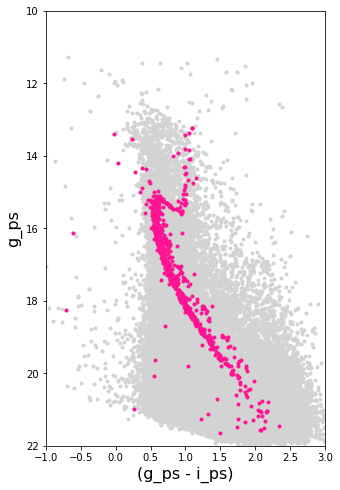

In [16]:
NGC188.membershipMin = 0.01
NGC188.plotCMD()

In [21]:
# output a .phot file for BASE-9
# I may want to rename the .py file.  When finished, upload to Drive
# double check with proposal that this is the only photometry we proposed to use
NGC188.photOutputFileName = 'inputs/ngc188.phot'
NGC188.generatePhotFile()

generating phot file ...


(-2.0, 4.0)

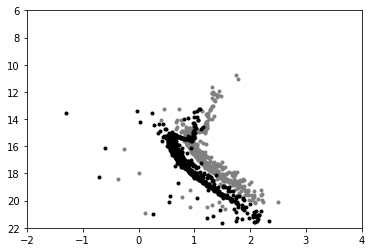

In [22]:
df = pd.read_csv(NGC188.photOutputFileName, delimiter=' ')
f, ax = plt.subplots()
ax.plot(df['G_BP'] - df['G_RP'], df['G'],'.', color='gray')
ax.plot(df['g_ps'] - df['i_ps'], df['g_ps'],'.', color='black')
ax.set_ylim(22, 6)
ax.set_xlim(-2,4)

In [25]:
# output a base9.yaml file for BASE-9?
NGC188.yamlOutputFileName = 'inputs/base9.yaml'
NGC188.yamlTemplateFileName = 'template_base9.yaml'
NGC188.yamlInputDict = {
    'photFile' : 'ngc188.phot',
    'outputFileBase' : 'output/ngc188',
    'modelDirectory' : 'base-models/',
    'msRgbModel' : 5,
    'Fe_H' : [0., 0., 0.3],
    'Av' : [0., 0., 0.3],
    'Y' : [0.29, 0.29, 0.0],
    'carbonicity' : [0.38, 0.38, 0.0],
    'logAge' : [9., 9., np.inf],
    'distMod' : [10., 10., 1.],
}

NGC188.generateYamlFile()

generating yaml file ...


## Testing as pipeline

(Though it will require some tweaking for clusters to define, e.g., distance, PM, etc.)

In [4]:
# read in my OC file and see if I can use that to define the input values
# https://github.com/ageller/compileOCs/blob/master/OCcompiled_clean.csv
clusterName = 'NGC_188'

OCdf = pd.read_csv('OCcompiled_clean_v2.csv')
row = OCdf.loc[OCdf['ID'] == clusterName].iloc[0]

# get the cluster center
center = SkyCoord(row['RA[hr]'], row['Dec[deg]'], unit=(units.hourangle, units.degree))
center.ra.to(units.degree).value

#calculate the distance modulus and error
dmod = 5.*np.log10(row['dist[pc]']) - 5.
err_dmod = (5.*1./np.log(10.)*(1./row['dist[pc]']))*row['err_dist[pc]'] # error propagation

# estimate the cluster tidal radius 
# equation from Binney and Tremaine for Jacoby Radius (8.91)
# at least for NGC 188, this seems a bit small...
# I'm adding a factor of 2 in front

# want this in degrees
Mg = 1.0*10**12 #*units.solMass #this probably could use verification and a reference
rt = row['rgc[pc]']*(row['mass[Msun]']/(3.*Mg))**(1./3.)
rtfac = 5.
radius = rtfac*np.arctan2(rt, row['dist[pc]'])*180./np.pi
print(radius, rt, dmod, err_dmod)
                  
# Note: many clusters won't have Av (and other values)
# for Av, I can get a value from a model, or just use 0

0.9147444428436675 6.124470445695659 11.414299621162435 0.08116582782552814


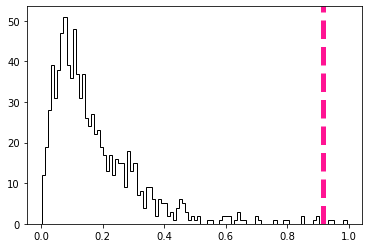

In [27]:
# quick check on the calculated tidal radius
f, ax = plt.subplots()
_ = ax.hist(NGC188.members['rCenter'].data, histtype='step', color='black', bins = 100)
ax.axvline(radius, ls='dashed', lw=5, color='deeppink')

In [28]:
row

ID                       NGC_188
RA[hr]              00 47 11.520
Dec[deg]            85 14 38.400
ID_Simbad                NGC_188
ID_MWSC                  NGC_188
ID_WEBDA                 NGC_188
ID_Piskunov                  NaN
ID_Kharchenko            NGC_188
ID_Salaris               NGC_188
ID_vandenBergh           NGC_188
ID_Cantat-Gaudin         NGC_188
ID_Lynga                 NGC_188
dist[pc]                 1918.05
err_dist[pc]           71.693343
N_dist[pc]                   6.0
age[Myr]             4051.035236
err_age[Myr]          952.045608
N_age[Myr]                   5.0
[Fe/H]                     -0.03
err_[Fe/H]              0.018708
N_[Fe/H]                     1.0
mass[Msun]                 838.1
err_mass[Msun]         481.16127
N_mass[Msun]                 5.0
rgc[pc]                  9368.65
err_rgc[pc]            13.187541
N_rgc[pc]                    2.0
rhm[pc]                 4.613305
err_rhm[pc]             0.317169
N_rhm[pc]                    1.0
Av[mag]   

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]
Finding radial-velocity members ... 
Finding parallax members ... 


finding proper-motion members ...


C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:345: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.set_ylim(self.PMymin, self.PMymax)


combining memberships ...
plotting CMD ...
generating phot file ...
generating yaml file ...
done.


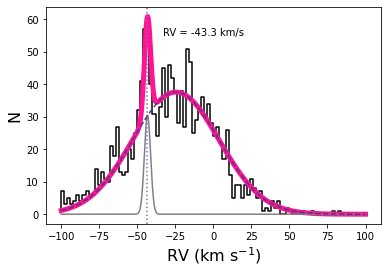

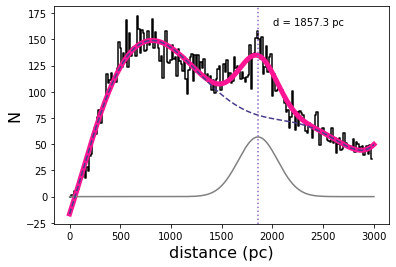

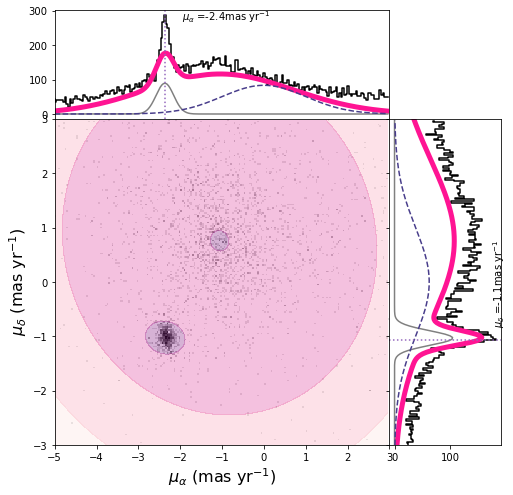

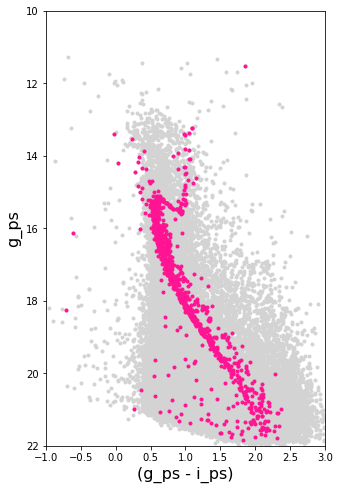

In [29]:
# I should test with reading in from my compiled OC list
cluster = GaiaClusterMembers(center.ra.to(units.degree).value, center.dec.to(units.degree).value, radius)
cluster.plotNameRoot = 'plots/'
cluster.distance = row['dist[pc]'] #pc
########
# this is not in my table.  I may want to work on making the code more robust so this is not needed
cluster.PMxmin = -5
cluster.PMxmax = 3
cluster.PMymin = -3
cluster.PMymax = 3
cluster.PMmean = [-2.5, -1]
cluster.PMxbins = 200
cluster.PMybins = 200
########
cluster.membershipMin = 0.01
cluster.verbose = 1
cluster.photOutputFileName = 'inputs/' + clusterName + '.phot'
cluster.yamlOutputFileName = 'inputs/base9.yaml'
cluster.yamlTemplateFileName = 'template_base9.yaml'
cluster.yamlInputDict = {
    'photFile' : 'inputs/' + clusterName + '.phot',
    'outputFileBase' : 'output/' + clusterName,
    'modelDirectory' : 'base-models/',
    'msRgbModel' : 5,
    'Fe_H' : [row['[Fe/H]'], row['[Fe/H]'], np.max([row['err_[Fe/H]'], 0.3])],
    'Av' : [row['Av[mag]'], row['Av[mag]'], np.max([row['err_Av[mag]'], 0.3])],
    'Y' : [0.29, 0.29, 0.0], # keep the defaults
    'carbonicity' : [0.38, 0.38, 0.0], # keep the defaults
    'logAge' : [np.log10(row['age[Myr]']*10**6), np.log10(row['age[Myr]']*10**6), np.inf],
    'distMod' : [dmod, dmod, np.max([err_dmod, 1.0])],
}
cluster.runAll()

In [31]:
# test writing to file
NGC188.saveDataToFile('NGC188_Gaia_r1deg.ecsv')

Saving data to file NGC188_Gaia_r1deg.ecsv ... 


In [33]:
# test reading from file
# if starting fresh, you will want to initialize the object
# NGC188 = GaiaClusterMembers(12.108, 85.255, 1)
# NGC188.verbose = 1
NGC188.readDataFromFile('NGC188_Gaia_r1deg.ecsv')
NGC188.data

Reading data from file NGC188_Gaia_r1deg.ecsv ... 


source_id,ra,dec,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,teff_gspphot,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,PRV,PPa,PPM,membership
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,K,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64
2300190316856449792,359.98750319791213,85.27731021181354,5.577777946544573,0.8223713177577376,--,19.63665,341.99533,20.002611,18.388771,19.328531,20.541069,-0.1341667036106458,--,0.94112283,1,0,20.0638008117676,0.0188410002738237,19.6161003112793,0.0171440001577139,19.4860992431641,0.0176279991865158,19.4738998413086,0.024957999587059,19.2819995880127,0.0314869992434978,--,--,--,--,--,--,0.0042036385,0.059109326,0.052991793,--,nan,0.0,0.0
2300190389873017344,359.98580433917704,85.29153336809398,-0.45119658435619325,-7.369807586160412,--,15.3995,3061.557,16.214743,423.20645,14.515954,665.11975,2.6719380963486183,4465.8047,1.0373826,1,0,16.5529003143311,0.00435000006109476,15.4191999435425,0.00275099999271333,14.9090995788574,0.00281400000676513,14.6612997055054,0.0038459999486804,14.5123996734619,0.00355900009162724,13.351,0.026,12.689,0.027,12.589,0.024,0.0027780489,0.0037903613,0.004116847,--,1.393492588159047e-14,0.0,0.0
2300194513040635392,359.9672581412721,85.35538913265248,-9.5544722428929,11.493419487214474,--,20.776224,104.699455,21.09304,5.081117,19.413204,11.7823105,0.2914078457257431,--,1.2037239,1,0,--,--,--,--,20.043399810791,0.0434660017490387,19.3617000579834,0.0285819992423058,19.0830993652344,0.0577099993824959,--,--,--,--,--,--,0.01072983,0.21369882,0.09222715,--,1.9210641383422348e-16,0.0,0.0
2300195539536739968,359.9561033834297,85.38657068886691,-3.6040957972934886,-4.830773107328921,--,19.797134,292.3895,20.890688,11.483998,18.660702,37.19538,1.6650491955322446,--,1.0105067,1,0,21.6236000061035,0.167224004864693,20.1315002441406,0.0238770004361868,19.0904006958008,0.0103240003809333,18.5962009429932,0.0114460000768304,18.3631000518799,0.0377160012722015,--,--,--,--,--,--,0.00462391,0.09458455,0.029433731,--,6.174760120055705e-11,0.0,0.0
2300195543833751936,359.93715165090276,85.39148265642352,-7.484505222627249,-1.0243014405359296,--,17.474413,1381.5422,18.050188,113.562935,16.749992,160.39871,0.45945903459236864,4855.8975,0.98020154,1,0,18.2007999420166,0.00268099992536008,17.4680004119873,0.00554100004956126,17.1201000213623,0.00322500010952353,16.9694995880127,0.00489299977198243,16.8798999786377,0.0127280000597239,15.859,0.079,15.547,0.127,15.157,0.138,0.0028652065,0.009959477,0.007752603,--,0.13324041474786458,0.0,0.0
573291861010519936,17.86475655428175,84.40895212731938,-3.1184996834597936,6.959047729898664,--,19.583765,309.9595,21.041176,6.721011,18.39454,41.02457,1.3949384522215436,--,0.975186,1,0,21.4948997497559,0.0286309998482466,20.2254009246826,0.0351330004632473,18.8167991638184,0.0133720003068447,18.1676006317139,0.00936200004070997,17.8712997436523,0.0117070004343987,16.453,0.115,15.657,0.116,15.62,0.204,0.0044566384,0.16156767,0.026734002,--,2.9527355739392034e-09,0.0,0.0
573291861010520576,17.916517386254274,84.40633591882035,1.7401034596752953,-2.190226773476811,--,17.22847,1246.6713,17.823576,83.66266,16.4942,238.91078,0.7474290084478957,4625.978,0.9977198,1,0,18.0048007965088,0.0119939995929599,17.2082996

## Try trimming the data interactively to select single stars

Incorporating this interactive (now within the GaiaClusterMembers class) : https://github.com/ageller/interactiveCMD

Note: This will only work on localhost:8888 (i.e., your first Jupyter session).

In [71]:
# I will read in the data file here because I'm doing this well after running the above, 
# but I think in principle this could be built into a pipeline using self.data
cluster = GaiaClusterMembers(12.108, 85.255, 1)
cluster.membershipMin = 0.01
cluster.readDataFromFile('NGC188_Gaia_r1deg.ecsv')

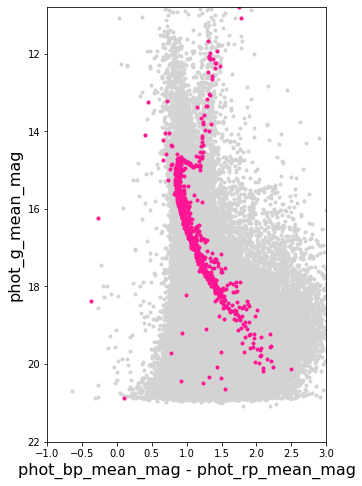

In [67]:
cluster.plotCMD(color1='phot_bp_mean_mag', color2='phot_rp_mean_mag', mag='phot_g_mean_mag')

In [68]:
output_notebook() # run in the notebook

Loading BokehJS ...

In [76]:
layout = cluster.createInteractive(color1='phot_bp_mean_mag', color2='phot_rp_mean_mag', mag='phot_g_mean_mag')

# in order to run a Python callback in a Jupyter notbook, you need to include the following
def bkapp(doc):
    doc.add_root(layout)

show(bkapp)

### Check

In [73]:
from astropy.io import ascii

import matplotlib.pyplot as plt
%matplotlib inline

(20.0, 10.0)

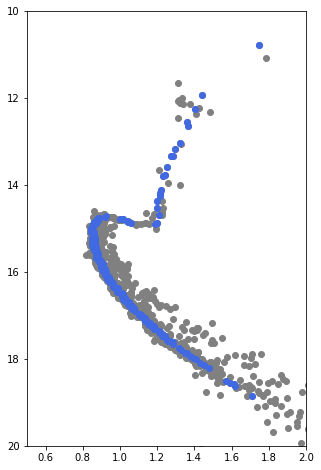

In [74]:
tbl = ascii.read('input.phot')
f,ax  = plt.subplots(figsize = (5,8))
ax.scatter(tbl['G_BP'] - tbl['G_RP'], tbl['G'], color='gray')
singles = tbl[tbl['useDBI'] == 1]
ax.scatter(singles['G_BP'] - singles['G_RP'], singles['G'], color='royalblue')

ax.set_xlim([0.5, 2])
ax.set_ylim([20, 10])

## Try reading in the existing phot file and outputting a sampled version

for time testing

In [3]:
from astropy.io import ascii
import numpy as np

In [19]:
gen = GaiaClusterMembers()
data = ascii.read('inputs/NGC_188.phot')
data

id,G,G_BPft,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,H_2M,Ks_2M,sigG,sigG_BPft,sigG_RP,sigg_ps,sigr_ps,sigi_ps,sigz_ps,sigy_ps,sigJ_2M,sigH_2M,sigKs_2M,mass1,massRatio,stage1,CMprior,useDBI
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,int32
110520001,10.0564,11.1854,9.0079,11.522,10.6138,9.671,9.0908,9.0991,7.466,6.599,6.4,0.01,0.01,0.01,0.0737,0.047,0.0595,0.0767,0.0725,0.026,0.033,0.026,0.0,0.0,1,0.203,1
104710002,10.7909,11.6393,9.8907,99.9,99.9,99.9,99.9,99.9,8.58,7.892,7.652,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.026,0.038,0.023,0.0,0.0,1,0.272,1
110470003,11.0748,11.9459,10.1629,99.9,99.9,99.9,99.9,99.9,8.889,8.098,7.909,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.027,0.053,0.02,0.0,0.0,1,0.277,1
106630004,11.1288,11.8191,10.3309,99.9,99.9,99.9,99.9,99.9,9.292,8.597,8.441,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.029,0.042,0.023,0.0,0.0,1,0.192,1
100250005,11.6651,12.2491,10.9395,99.9,99.9,99.9,99.9,99.9,9.966,9.398,9.26,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.027,0.029,0.021,0.0,0.0,1,0.179,1
101610006,11.9237,12.5855,11.1456,99.9,99.9,99.9,99.9,99.9,10.098,9.461,9.304,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.025,0.03,0.019,0.0,0.0,1,0.118,1
108930007,11.993,12.5921,11.2606,99.9,99.9,99.9,99.9,99.9,10.252,9.768,9.62,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.025,0.034,0.02,0.0,0.0,1,0.272,1
100540008,12.0495,12.6406,11.3226,99.9,99.9,99.9,99.9,99.9,10.349,9.789,9.639,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.025,0.031,0.021,0.0,0.0,1,0.225,1
109210009,12.0802,12.6695,11.3557,99.9,99.9,99.9,99.9,99.9,10.403,9.837,9.702,0.01,0.01,0.01,-9.9,-9.9,-9.9,-9.9,-9.9,0.027,0.031,0.021,0.0,0.0,1,0.24,1


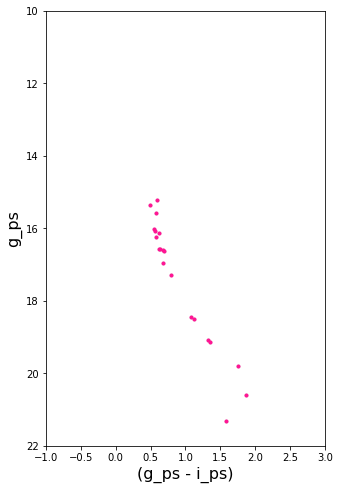

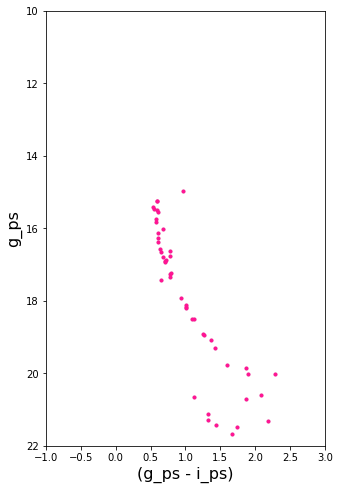

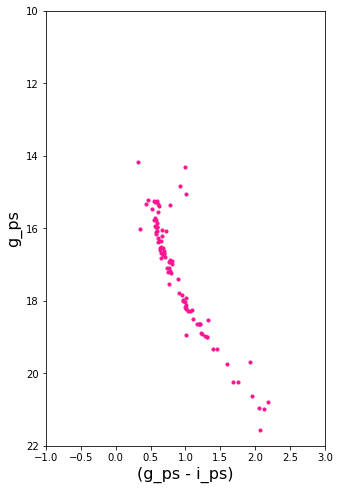

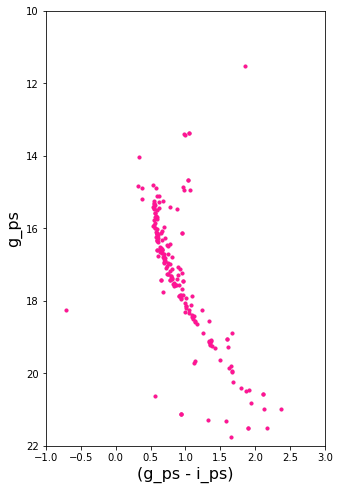

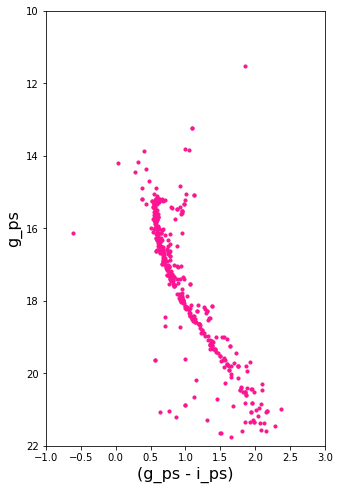

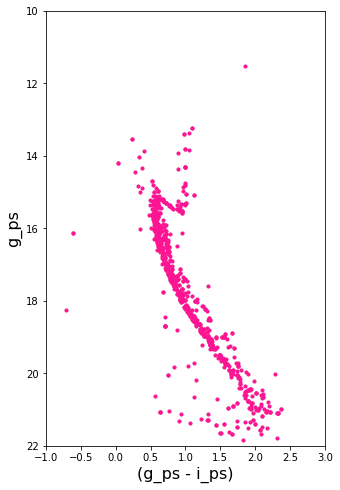

In [28]:
sizes = [20, 50, 100, 200, 500, 1000]
for s in sizes:
    indices = np.random.choice(np.arange(0,len(data)), size=s)
    foo = data[indices]
    gen.plotCMD(data=foo, color1='g_ps', color2='i_ps', mag='g_ps', mem='CMprior', savefig=False)
    gen.dumpPhotFile(foo, filename='inputs/NGC188_'+str(s)+'.phot')